In [1]:
import pandas as pd
import textwrap
import warnings

In [2]:
# Standard data science imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics packages
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats

# Scikit-learn
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

# Import chisquare from SciPy.stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [3]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [4]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/Users/rednebula/Desktop/WGU/Capstone/data.csv')

In [5]:
df.head()

,title,mm_title,runtime,rating,metascore,votes,gross,popularity,revenue,vote_average,vote_count,stars,rating-2,first_genre,star1,star2
0,Get Rich or Die Tryin',Get Rich or Die Tryin',117,5.4,45.0,48792,30.98,9.820229,46442528,6.3,188,"['50 Cent', 'Joy Bryant', 'Adewale Akinnuoye-A...",Low,Biography,50 Cent,JoyBryant
1,Phantasm,Phantasm,89,6.6,72.0,39389,11.99,6.609336,11988469,6.5,166,"['A. Michael Baldwin', 'Bill Thornbury', 'Regg...",Low,Horror,A. Michael Baldwin,BillThornbury
2,Final Destination 2,Final Destination 2,90,6.2,38.0,175345,46.96,12.638573,90426405,5.9,1046,"['A.J. Cook', 'Ali Larter', 'Tony Todd', 'Mich...",Low,Horror,A.J. Cook,AliLarter
3,Queen of the Damned,Queen of the Damned,101,5.2,30.0,58306,30.34,8.436243,45479110,5.5,247,"['Aaliyah', 'Stuart Townsend', 'Marguerite Mor...",Low,Drama,Aaliyah,StuartTownsend
4,3 Idiots,3 Idiots,170,8.4,67.0,415432,6.53,7.675621,70000000,7.8,850,"['Aamir Khan', 'Madhavan', 'Mona Singh', 'Shar...",High,Comedy,Aamir Khan,Madhavan


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         9720 non-null   object 
 1   mm_title      9720 non-null   object 
 2   runtime       9720 non-null   int64  
 3   rating        9720 non-null   float64
 4   metascore     8092 non-null   float64
 5   votes         9720 non-null   int64  
 6   gross         7642 non-null   float64
 7   popularity    9720 non-null   float64
 8   revenue       9720 non-null   int64  
 9   vote_average  9720 non-null   float64
 10  vote_count    9720 non-null   int64  
 11  stars         9720 non-null   object 
 12  rating-2      9720 non-null   object 
 13  first_genre   9720 non-null   object 
 14  star1         9720 non-null   object 
 15  star2         9719 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory usage: 1.2+ MB


In [7]:
#Print Dataframe
df.describe()

,runtime,rating,metascore,votes,gross,popularity,revenue,vote_average,vote_count
count,9720.000000,9720.000000,8092.000000,9.720000e+03,7642.000000,9720.000000,9.720000e+03,9720.000000,9720.000000
mean,109.163580,6.710556,58.731587,9.579398e+04,40.167386,8.094200,5.110413e+07,6.299609,457.288786
std,21.030113,0.799286,17.537484,1.705282e+05,63.786390,11.963674,1.318607e+08,1.133881,970.147188
min,46.000000,4.900000,7.000000,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,95.000000,6.100000,46.000000,1.790050e+04,2.960000,3.913992,0.000000e+00,5.800000,48.000000
50%,106.000000,6.700000,59.000000,3.742900e+04,17.800000,7.021942,6.443715e+05,6.400000,124.000000
75%,119.000000,7.300000,72.000000,9.892225e+04,49.137500,10.339129,4.058025e+07,7.000000,397.000000
max,439.000000,9.300000,100.000000,2.780534e+06,760.510000,547.488298,2.787965e+09,10.000000,14075.000000


In [8]:
# Drop duplicates in 'title' while keeping the first occurrence
df = df.drop_duplicates(subset=['title'])

In [9]:
#Print Dataframe
df.describe()

,runtime,rating,metascore,votes,gross,popularity,revenue,vote_average,vote_count
count,7374.000000,7374.000000,6153.000000,7.374000e+03,5909.000000,7374.000000,7.374000e+03,7374.000000,7374.000000
mean,109.046786,6.713331,58.594832,9.791005e+04,39.007986,8.659554,5.572162e+07,6.424207,502.245457
std,20.801591,0.800166,17.400212,1.780123e+05,60.871717,10.929662,1.349070e+08,0.908858,1014.897267
min,46.000000,4.900000,7.000000,1.000000e+04,0.000000,0.000220,0.000000e+00,0.000000,0.000000
25%,95.000000,6.100000,46.000000,1.761575e+04,2.850000,4.910604,0.000000e+00,5.900000,64.000000
50%,105.000000,6.700000,59.000000,3.699900e+04,17.500000,7.510771,4.052542e+06,6.500000,148.000000
75%,118.000000,7.300000,71.000000,1.000665e+05,48.200000,10.690440,4.800430e+07,7.000000,452.750000
max,439.000000,9.300000,100.000000,2.780534e+06,760.510000,547.488298,2.787965e+09,10.000000,14075.000000


In [10]:
df.isnull().sum()

title              0
mm_title           0
runtime            0
rating             0
metascore       1221
votes              0
gross           1465
popularity         0
revenue            0
vote_average       0
vote_count         0
stars              0
rating-2           0
first_genre        0
star1              0
star2              1
dtype: int64

In [11]:
# Calculate the mean of the numeric field
mean_value = df['gross'].mean()

In [12]:
# Fill missing values with the mean
df['gross'].fillna(mean_value, inplace=True)

In [13]:
# Calculate the mean of the numeric field
mean_value2 = df['metascore'].mean()

In [14]:
# Fill missing values with the mean
df['metascore'].fillna(mean_value, inplace=True)

In [17]:
df.isnull().sum()

title           0
mm_title        0
runtime         0
rating          0
metascore       0
votes           0
gross           0
popularity      0
revenue         0
vote_average    0
vote_count      0
stars           0
rating-2        0
first_genre     0
star1           0
star2           1
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7374 entries, 0 to 9719
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         7374 non-null   object 
 1   mm_title      7374 non-null   object 
 2   runtime       7374 non-null   int64  
 3   rating        7374 non-null   float64
 4   metascore     7374 non-null   float64
 5   votes         7374 non-null   int64  
 6   gross         7374 non-null   float64
 7   popularity    7374 non-null   float64
 8   revenue       7374 non-null   int64  
 9   vote_average  7374 non-null   float64
 10  vote_count    7374 non-null   int64  
 11  stars         7374 non-null   object 
 12  rating-2      7374 non-null   object 
 13  first_genre   7374 non-null   object 
 14  star1         7374 non-null   object 
 15  star2         7373 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory usage: 979.4+ KB


In [19]:
#Print Dataframe
df.describe()

,runtime,rating,metascore,votes,gross,popularity,revenue,vote_average,vote_count
count,7374.000000,7374.000000,7374.000000,7.374000e+03,7374.000000,7374.000000,7.374000e+03,7374.000000,7374.000000
mean,109.046786,6.713331,55.351607,9.791005e+04,39.007986,8.659554,5.572162e+07,6.424207,502.245457
std,20.801591,0.800166,17.482593,1.780123e+05,54.489607,10.929662,1.349070e+08,0.908858,1014.897267
min,46.000000,4.900000,7.000000,1.000000e+04,0.000000,0.000220,0.000000e+00,0.000000,0.000000
25%,95.000000,6.100000,39.007986,1.761575e+04,5.312500,4.910604,0.000000e+00,5.900000,64.000000
50%,105.000000,6.700000,54.000000,3.699900e+04,30.530000,7.510771,4.052542e+06,6.500000,148.000000
75%,118.000000,7.300000,68.000000,1.000665e+05,39.007986,10.690440,4.800430e+07,7.000000,452.750000
max,439.000000,9.300000,100.000000,2.780534e+06,760.510000,547.488298,2.787965e+09,10.000000,14075.000000


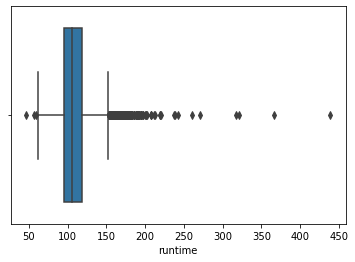

In [20]:
boxplot=sns.boxplot(x='runtime',data=df)

In [21]:
# Calculate the z-scores for the 'runtime' column
z_scores = stats.zscore(df['runtime'])
 
# Define a threshold to identify outliers
threshold = 3
 
# Identify the indices of outliers
outlier_indices = (z_scores > threshold)
 
# Remove the outliers from the DataFrame
df = df[~outlier_indices]

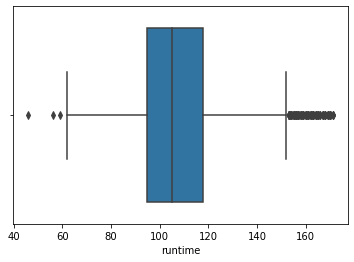

In [22]:
boxplot=sns.boxplot(x='runtime',data=df)

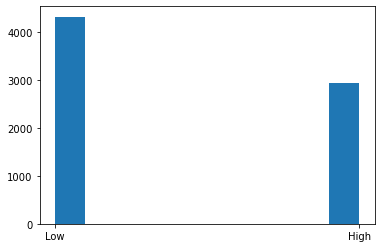

In [23]:
plt.hist(df['rating-2'])
plt.show()

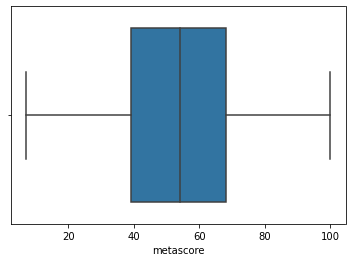

In [24]:
boxplot=sns.boxplot(x='metascore',data=df)

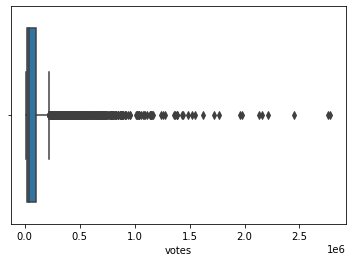

In [25]:
boxplot=sns.boxplot(x='votes',data=df)

In [26]:
# Calculate the z-scores for the 'votes' column
z_scores = stats.zscore(df['votes'])
 
# Define a threshold to identify outliers
threshold = 3
 
# Identify the indices of outliers
outlier_indices = (z_scores > threshold)
 
# Remove the outliers from the DataFrame
df = df[~outlier_indices]

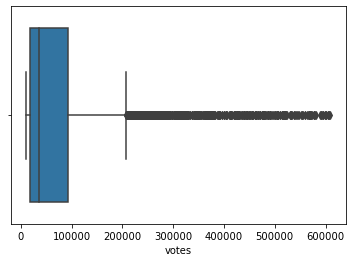

In [27]:
boxplot=sns.boxplot(x='votes',data=df)

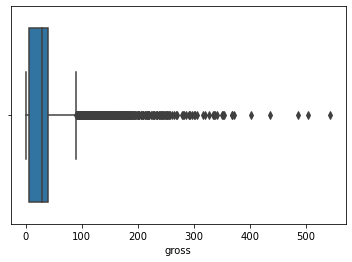

In [28]:
boxplot=sns.boxplot(x='gross',data=df)

In [29]:
# Calculate the z-scores for the 'gross' column
z_scores = stats.zscore(df['gross'])
 
# Define a threshold to identify outliers
threshold = 3
 
# Identify the indices of outliers
outlier_indices = (z_scores > threshold)
 
# Remove the outliers from the DataFrame
df = df[~outlier_indices]

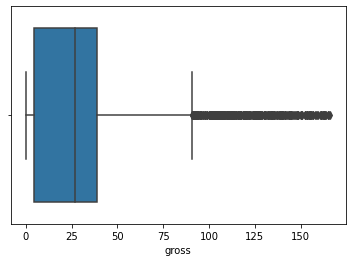

In [30]:
boxplot=sns.boxplot(x='gross',data=df)

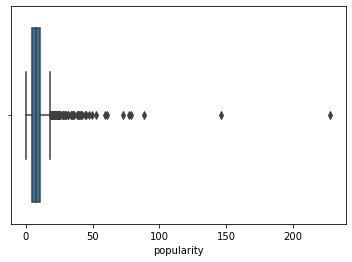

In [31]:
boxplot=sns.boxplot(x='popularity',data=df)

In [32]:
# Calculate the z-scores for the 'popularity' column
z_scores = stats.zscore(df['popularity'])
 
# Define a threshold to identify outliers
threshold = 3
 
# Identify the indices of outliers
outlier_indices = (z_scores > threshold)
 
# Remove the outliers from the DataFrame
df = df[~outlier_indices]

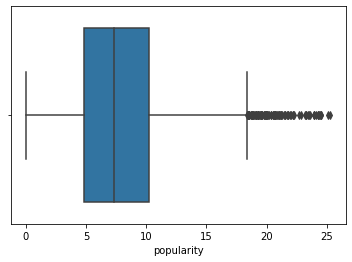

In [33]:
boxplot=sns.boxplot(x='popularity',data=df)

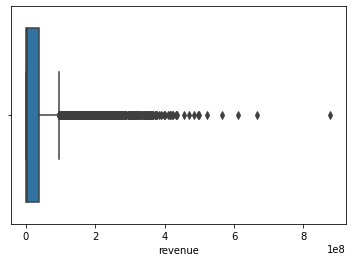

In [34]:
boxplot=sns.boxplot(x='revenue',data=df)

In [37]:
# Calculate the z-scores for the 'LifeTimeGiving' column
z_scores = stats.zscore(df['revenue'])
 
# Define a threshold to identify outliers
threshold = 3
 
# Identify the indices of outliers
outlier_indices = (z_scores > threshold)
 
# Remove the outliers from the DataFrame
df = df[~outlier_indices]

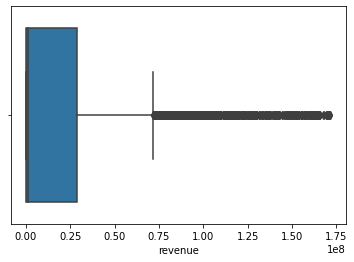

In [38]:
boxplot=sns.boxplot(x='revenue',data=df)

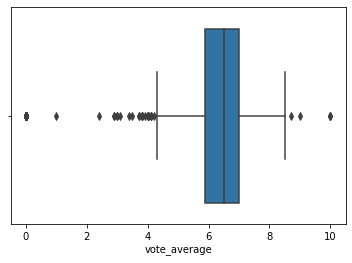

In [39]:
boxplot=sns.boxplot(x='vote_average',data=df)

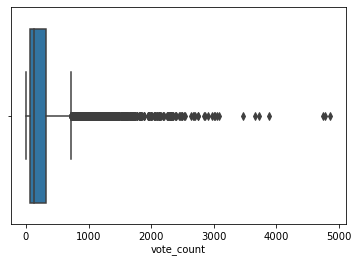

In [40]:
boxplot=sns.boxplot(x='vote_count',data=df)

In [41]:
# Calculate the z-scores for the 'vote_count' column
z_scores = stats.zscore(df['vote_count'])
 
# Define a threshold to identify outliers
threshold = 3
 
# Identify the indices of outliers
outlier_indices = (z_scores > threshold)
 
# Remove the outliers from the DataFrame
df = df[~outlier_indices]

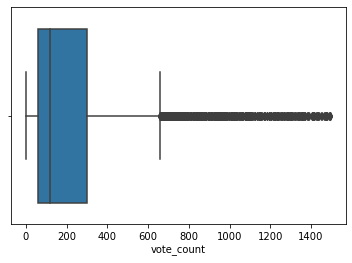

In [42]:
boxplot=sns.boxplot(x='vote_count',data=df)

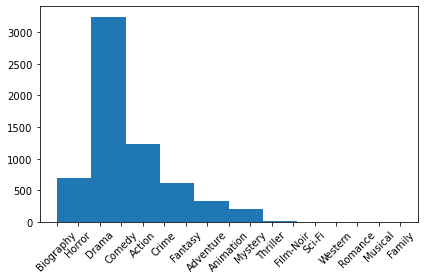

In [43]:
# Extract the column for the histogram
values = df['first_genre']

#ignore warnings
warnings.filterwarnings('ignore')

# Create the histogram
plt.hist(values)

# Customize the x-axis labels (rotating them by 45 degrees)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [101]:
# Group by actors and count how many times each actor appears
first_actor_counts = df['star1'].value_counts()

In [102]:
%matplotlib inline

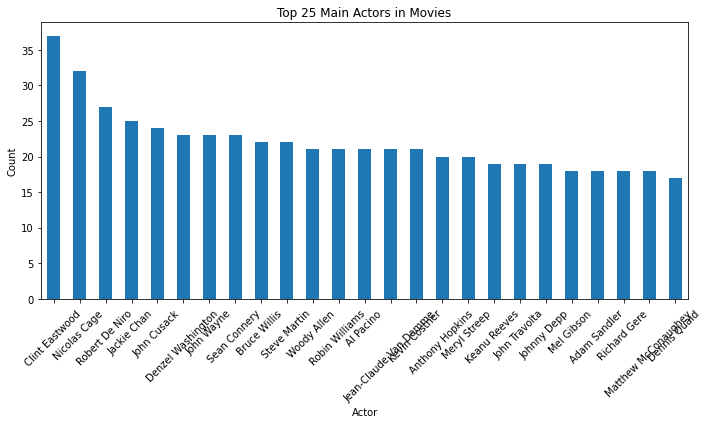

In [104]:
# Select the top 25 actors based on their counts
top_25_actors = first_actor_counts.head(25)

# Plot the top 20 actors as a bar chart
plt.figure(figsize=(10, 6))
top_20_actors.plot(kind='bar')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.title('Top 25 Main Actors in Movies')
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()

In [108]:
# Group by actors and count how many times each actor appears
second_actor_counts = df['star2'].value_counts()

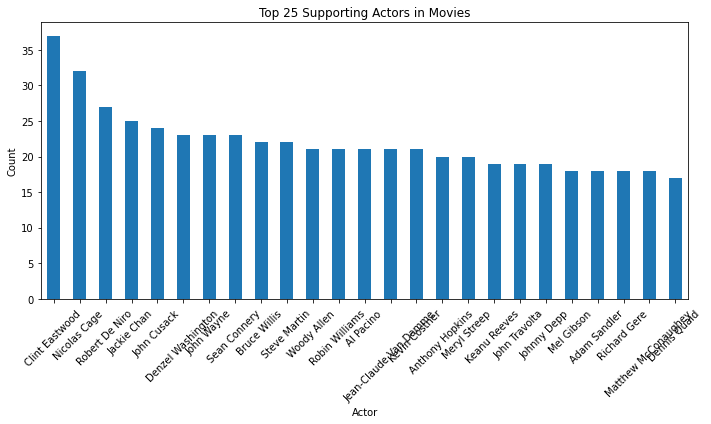

In [109]:
# Select the top 25 actors based on their counts
top_25_actors = second_actor_counts.head(25)

# Plot the top 20 actors as a bar chart
plt.figure(figsize=(10, 6))
top_20_actors.plot(kind='bar')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.title('Top 25 Supporting Actors in Movies')
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()

In [44]:
#Print Dataframe
df.describe()

,runtime,rating,metascore,votes,gross,popularity,revenue,vote_average,vote_count
count,6358.000000,6358.000000,6358.000000,6358.000000,6358.000000,6358.000000,6.358000e+03,6358.000000,6358.000000
mean,106.849953,6.664942,54.467197,54378.638251,25.359545,7.239261,2.024554e+07,6.384775,233.168606
std,17.251560,0.780411,17.402643,62471.574784,23.316165,3.818003,3.523519e+07,0.904113,278.504870
min,46.000000,4.900000,7.000000,10000.000000,0.000000,0.000220,0.000000e+00,0.000000,0.000000
25%,95.000000,6.100000,39.007986,16193.000000,3.682500,4.617872,0.000000e+00,5.900000,58.000000
50%,104.000000,6.700000,53.000000,29927.000000,22.360000,6.936753,6.134010e+05,6.400000,119.000000
75%,116.000000,7.300000,68.000000,66306.000000,39.007986,9.645372,2.546339e+07,7.000000,298.000000
max,171.000000,9.200000,100.000000,598228.000000,158.120000,25.301568,1.715048e+08,10.000000,1495.000000


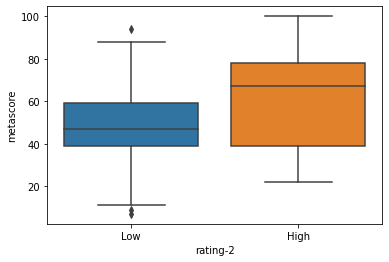

In [45]:
sns.boxplot(x='rating-2',y='metascore', data=df)
plt.show()

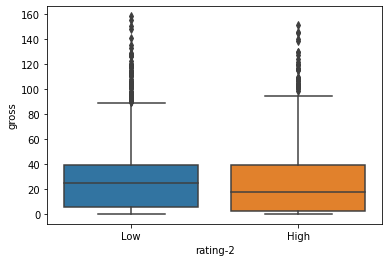

In [46]:
sns.boxplot(x='rating-2',y='gross', data=df)
plt.show()

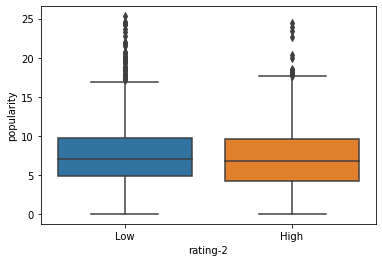

In [47]:
sns.boxplot(x='rating-2',y='popularity', data=df)
plt.show()

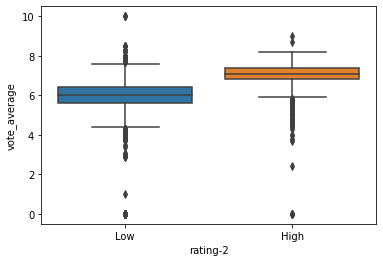

In [49]:
sns.boxplot(x='rating-2',y='vote_average', data=df)
plt.show()

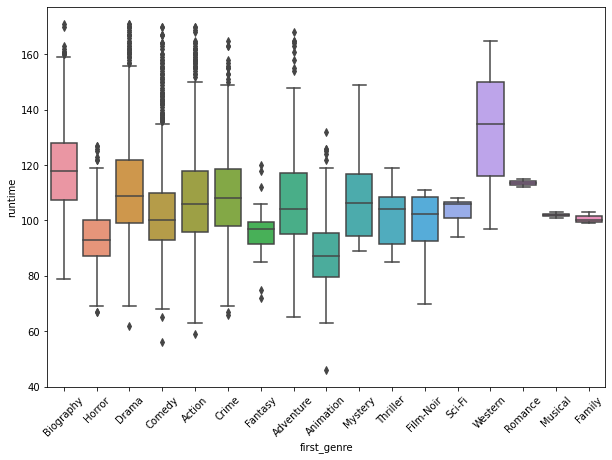

In [124]:
sns.boxplot(x='first_genre',y='runtime', data=df)
# Customize the x-axis labels (rotating them by 45 degrees)
plt.xticks(rotation=45)
plt.show()

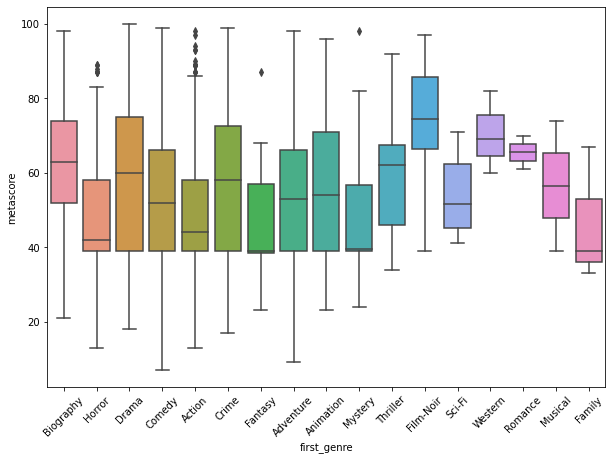

In [125]:
sns.boxplot(x='first_genre',y='metascore', data=df)
# Customize the x-axis labels (rotating them by 45 degrees)
plt.xticks(rotation=45)
plt.show()

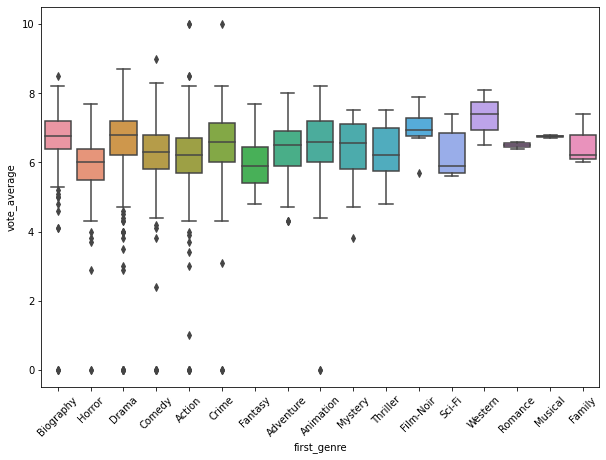

In [126]:
sns.boxplot(x='first_genre',y='vote_average', data=df)
# Customize the x-axis labels (rotating them by 45 degrees)
plt.xticks(rotation=45)
plt.show()

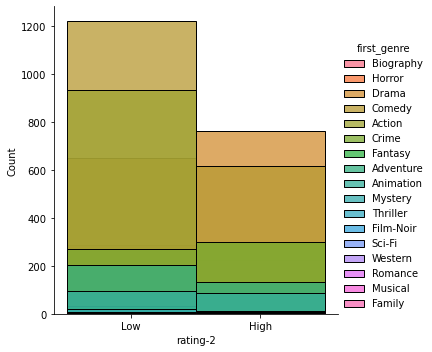

In [53]:
sns.FacetGrid(df,hue = 'first_genre', height = 5).map(sns.histplot, 'rating-2').add_legend()

<AxesSubplot:xlabel='runtime', ylabel='vote_average'>

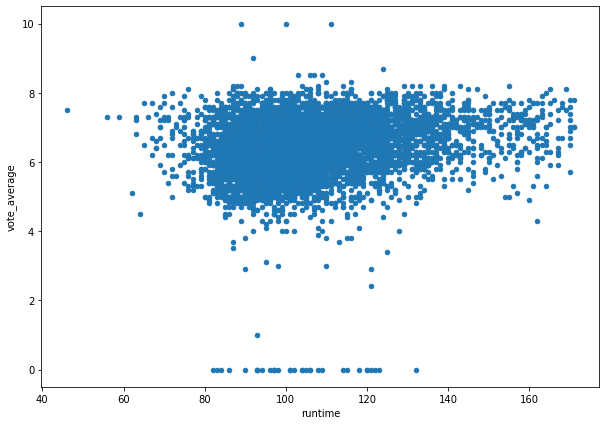

In [127]:
df.plot.scatter(x='runtime', y='vote_average')

<AxesSubplot:xlabel='gross', ylabel='runtime'>

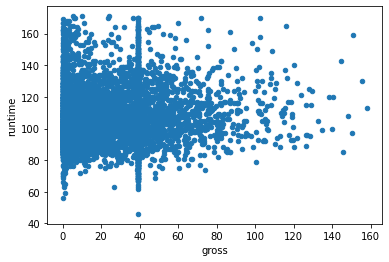

In [55]:
df.plot.scatter(x='gross', y='runtime')

<AxesSubplot:xlabel='metascore', ylabel='vote_average'>

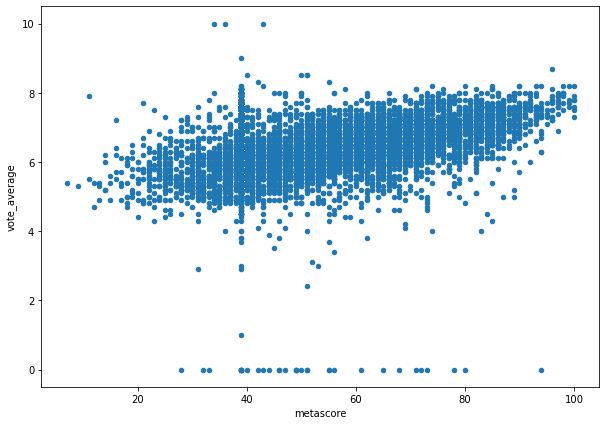

In [130]:
df.plot.scatter(x='metascore', y='vote_average')

In [117]:
# will replace "Yes" value in dataframe with 1
df = df.replace("High",1)

In [118]:
# will replace "No" value in dataframe with 0
df = df.replace("Low",0)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6358 entries, 0 to 9719
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         6358 non-null   object 
 1   mm_title      6358 non-null   object 
 2   runtime       6358 non-null   int64  
 3   rating        6358 non-null   float64
 4   metascore     6358 non-null   float64
 5   votes         6358 non-null   int64  
 6   gross         6358 non-null   float64
 7   popularity    6358 non-null   float64
 8   revenue       6358 non-null   int64  
 9   vote_average  6358 non-null   float64
 10  vote_count    6358 non-null   int64  
 11  stars         6358 non-null   object 
 12  rating-2      6358 non-null   int64  
 13  first_genre   6358 non-null   object 
 14  star1         6358 non-null   object 
 15  star2         6357 non-null   object 
dtypes: float64(5), int64(5), object(6)
memory usage: 1.1+ MB


In [122]:
df.head()

,title,mm_title,runtime,rating,metascore,votes,gross,popularity,revenue,vote_average,vote_count,stars,rating-2,first_genre,star1,star2
0,Get Rich or Die Tryin',Get Rich or Die Tryin',117,5.4,45.0,48792,30.98,9.820229,46442528,6.3,188,"['50 Cent', 'Joy Bryant', 'Adewale Akinnuoye-A...",0,Biography,50 Cent,JoyBryant
1,Phantasm,Phantasm,89,6.6,72.0,39389,11.99,6.609336,11988469,6.5,166,"['A. Michael Baldwin', 'Bill Thornbury', 'Regg...",0,Horror,A. Michael Baldwin,BillThornbury
2,Final Destination 2,Final Destination 2,90,6.2,38.0,175345,46.96,12.638573,90426405,5.9,1046,"['A.J. Cook', 'Ali Larter', 'Tony Todd', 'Mich...",0,Horror,A.J. Cook,AliLarter
3,Queen of the Damned,Queen of the Damned,101,5.2,30.0,58306,30.34,8.436243,45479110,5.5,247,"['Aaliyah', 'Stuart Townsend', 'Marguerite Mor...",0,Drama,Aaliyah,StuartTownsend
4,3 Idiots,3 Idiots,170,8.4,67.0,415432,6.53,7.675621,70000000,7.8,850,"['Aamir Khan', 'Madhavan', 'Mona Singh', 'Shar...",1,Comedy,Aamir Khan,Madhavan


In [120]:
df.corr()

,runtime,rating,metascore,votes,gross,popularity,revenue,vote_average,vote_count,rating-2
runtime,1.000000,0.317924,0.141392,0.141865,0.037997,-0.025827,0.111173,0.210149,0.023597,0.260125
rating,0.317924,1.000000,0.524550,0.227129,-0.077053,-0.036132,-0.086330,0.697012,0.061197,0.809240
metascore,0.141392,0.524550,1.000000,0.220634,-0.112320,0.078415,-0.000751,0.370154,0.110177,0.423998
votes,0.141865,0.227129,0.220634,1.000000,0.310170,0.306192,0.447694,0.149287,0.731574,0.181910
gross,0.037997,-0.077053,-0.112320,0.310170,1.000000,0.108459,0.531272,-0.065555,0.244687,-0.067107
popularity,-0.025827,-0.036132,0.078415,0.306192,0.108459,1.000000,0.347116,0.086964,0.509995,-0.041291
revenue,0.111173,-0.086330,-0.000751,0.447694,0.531272,0.347116,1.000000,-0.040316,0.589043,-0.084315
vote_average,0.210149,0.697012,0.370154,0.149287,-0.065555,0.086964,-0.040316,1.000000,0.117522,0.576557
vote_count,0.023597,0.061197,0.110177,0.731574,0.244687,0.509995,0.589043,0.117522,1.000000,0.043263
rating-2,0.260125,0.809240,0.423998,0.181910,-0.067107,-0.041291,-0.084315,0.576557,0.043263,1.000000


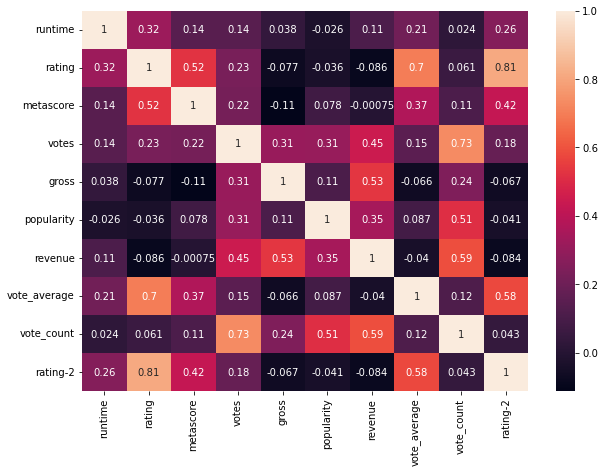

In [121]:
sns.heatmap(df.corr(), annot = True)
plt.rcParams['figure.figsize'] = (10,7)
plt.show()

In [114]:
corrMatrix = df.corr()
print (corrMatrix)

               runtime    rating  metascore     votes     gross  popularity  \
runtime       1.000000  0.317924   0.141392  0.141865  0.037997   -0.025827   
rating        0.317924  1.000000   0.524550  0.227129 -0.077053   -0.036132   
metascore     0.141392  0.524550   1.000000  0.220634 -0.112320    0.078415   
votes         0.141865  0.227129   0.220634  1.000000  0.310170    0.306192   
gross         0.037997 -0.077053  -0.112320  0.310170  1.000000    0.108459   
popularity   -0.025827 -0.036132   0.078415  0.306192  0.108459    1.000000   
revenue       0.111173 -0.086330  -0.000751  0.447694  0.531272    0.347116   
vote_average  0.210149  0.697012   0.370154  0.149287 -0.065555    0.086964   
vote_count    0.023597  0.061197   0.110177  0.731574  0.244687    0.509995   
rating-2      0.260125  0.809240   0.423998  0.181910 -0.067107   -0.041291   

               revenue  vote_average  vote_count  rating-2  
runtime       0.111173      0.210149    0.023597  0.260125  
rating  

<AxesSubplot:>

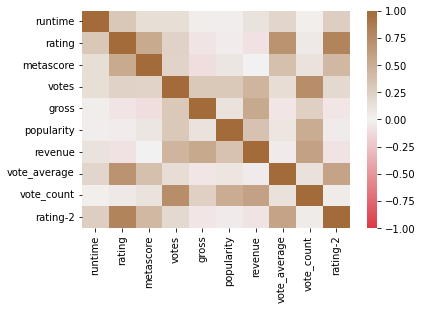

In [115]:
sns.heatmap(df.corr(), vmin=-1, vmax=1,
cmap= sns.diverging_palette(10, 400, as_cmap=True))

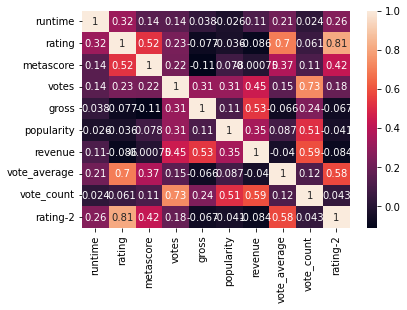

In [116]:
sns.heatmap(df.corr(), annot = True)
plt.rcParams['figure.figsize'] = (10,7)
plt.show()

In [65]:
X = df [['runtime', 'metascore', 'vote_average']]
y = df ['rating-2']

In [66]:
# Split the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [70]:
# Create a Logistic Regression Object, perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [71]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [72]:
# Show to Coeficient and Intercept
print(log_reg.coef_)
print(log_reg.intercept_)

[[0.02446654 0.03800871 2.79872816]]
[-23.5575112]


In [73]:
# Perform prediction using the test dataset
y_pred = log_reg.predict(X_test)

In [74]:
# Show the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[885, 112],
       [117, 476]])

In [75]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8559748427672956
Precision: 0.8095238095238095
Recall: 0.8026981450252951


In [123]:
import statsmodels.api as sm
Logit_model = sm.Logit(y, sm.add_constant(X)).fit()
Logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.368716
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               rating-2   No. Observations:                 6358
Model:                          Logit   Df Residuals:                     6354
Method:                           MLE   Df Model:                            3
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.4493
Time:                        19:59:02   Log-Likelihood:                -2344.3
converged:                       True   LL-Null:                       -4256.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -23.4724      0.601    -39.067      0.000     -24.650     -22.295
runtime          0.0231      0.002     10.692      0.000       0.019       0.027
metascore        0.0377      0.002     15.729      0.000       0.033       0.042
vote_average     2.8069      0.079     35.449      0.000       2.652       2.962
================================================================================
"""